In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
#load the dataset
df= pd.read_csv ("diabetes.csv")
#show the first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# dataset overview
print("Shape:", df.shape)
print("\nColumns:", df.columns)

Shape: (768, 9)

Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [5]:
# checking for the missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


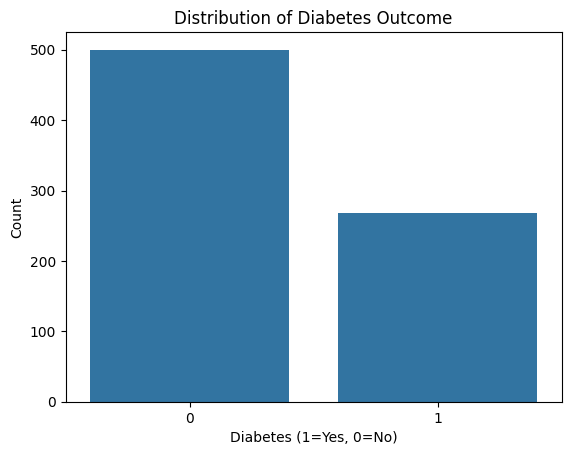

In [6]:
#see the outcome distribution
sns.countplot(x="Outcome", data=df)
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Diabetes (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

NameError: name 'plyt' is not defined

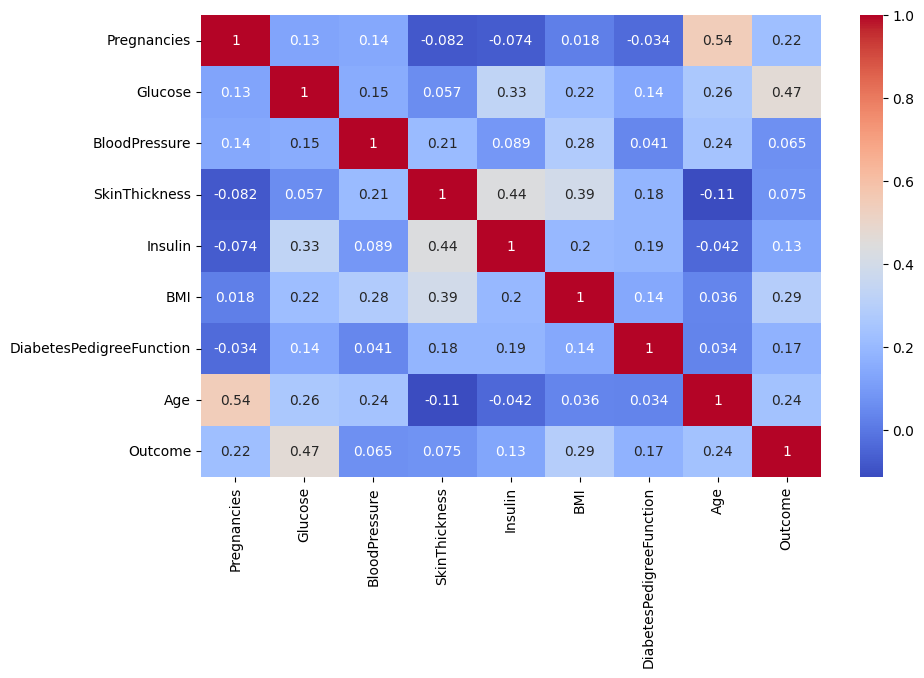

In [7]:
#plot a correlation heatmap
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plyt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
# Features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
#train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression (max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC AUC Score: 0.7303030303030302


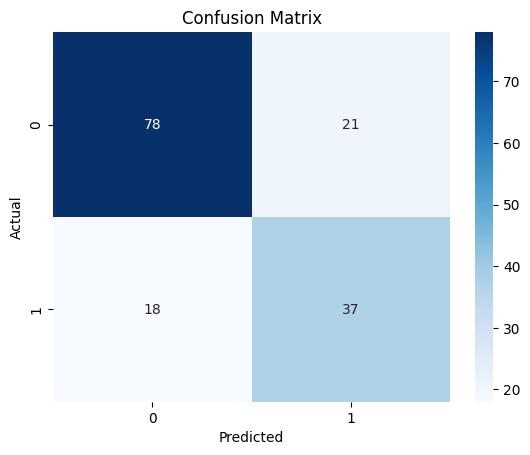

In [10]:
#evaluate the model
# Predict on test data
y_pred = model.predict(X_test)

# Classification metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
# lets try another model random forest model
from sklearn.ensemble import RandomForestClassifier

In [15]:
#trian the model
#create and test the model 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

ROC AUC Score: 0.697979797979798


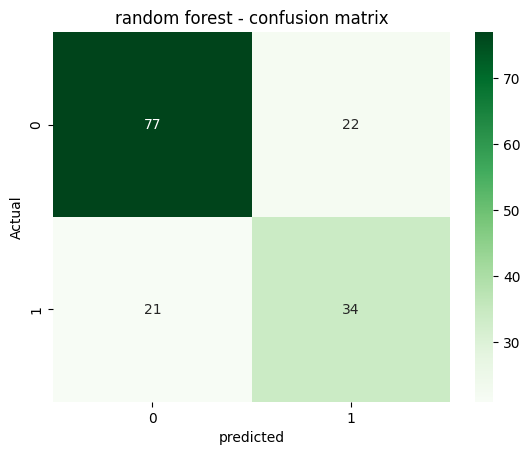

In [20]:
#makeing the predicitions and evaluate
#predict the test set
rf_pred = rf_model.predict(X_test)


#Evaaluate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_pred))

#confusion matrix
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap = "Greens")
plt.title("random forest - confusion matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

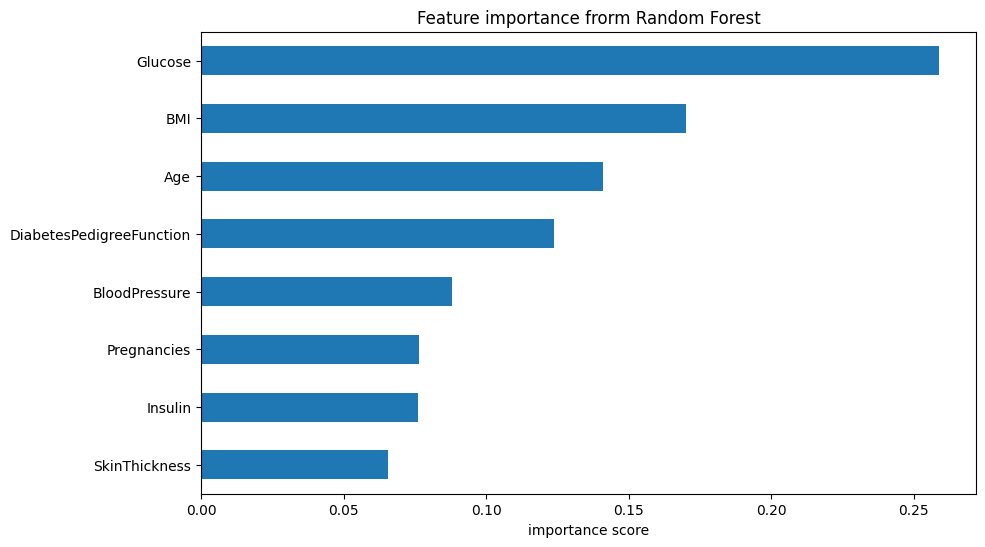

In [22]:
#Checkk the feature importance

#plot top features

import pandas as pd

feature_importance = pd.Series (rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind="barh", figsize = (10,6))
plt.title("Feature importance frorm Random Forest")
plt.xlabel("importance score")
plt.show()
